In [27]:
#from six.moves import cPickle as pickle1
import pickle
import numpy as np
import os
import time
import matplotlib.pyplot as plt

import tensorflow as tf

def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

cifar10_dir = './cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)


Ind1=np.arange(50000)
y=np.zeros((50000,10))
y[Ind1,y_train[Ind1]]=1
Ind2=np.arange(10000)
y_val=np.zeros((10000,10))
y_val[Ind2,y_test[Ind2]]=1

y_train=y
y_test=y_val

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 10)


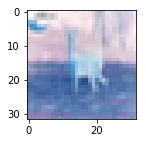

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(X_train[959])
plt.show()

In [58]:
# this will save into a folder called dataset, which I have added to .gitignore
with open('dataset/cifar10_data.pickle', 'wb') as handle:
    pickle.dump((X_train, y_train, X_test, y_test), handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# load with
with open('dataset/cifar10_data.pickle', 'rb') as handle:
    X_train, y_train, X_test, y_test = pickle.load(handle)
    
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 10)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 10)
